In [137]:
import pandas as pd
import numpy as np
import os 
import statistics 
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
#from sklearn import preprocessing
#from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem, spearmanr
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import pingouin as pg
from pingouin import ttest
from scipy.special import logsumexp

In [138]:
current_dir = os.getcwd()
updatedchoicedata = pd.read_csv('shortformdata_DF.csv')
plottingdata = pd.read_csv('longformdata_DF_plotting.csv')

In [139]:
display(updatedchoicedata)

,PROLIFIC_ID,condition_recode,afterstresschange,salience_mean,stress_mean,recoded_stress,choice,rej-acc,ifnegvalue,choicertmean,timebetween,age,sex
0,568d286ab5a2c2000cb6a91c,0,1.0,4.0,5.0,5.0,0.833333,-0.5,1,1.166667,2.0,34.0,0.0
1,568d286ab5a2c2000cb6a91c,1,1.0,1.5,4.5,4.5,1.000000,-0.5,1,1.083333,2.0,34.0,0.0
2,568d286ab5a2c2000cb6a91c,2,1.0,3.5,5.0,5.0,1.000000,-0.5,1,0.363636,2.0,34.0,0.0
3,595727bd7c76640001aa8f6e,0,1.0,4.0,5.0,5.0,0.600000,1.0,0,1.600000,16.0,23.0,0.0
4,595727bd7c76640001aa8f6e,1,1.0,4.0,7.0,7.0,0.250000,1.0,0,1.583333,16.0,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,641361334c91a0c6ff4c5b79,1,1.0,1.0,9.0,9.0,1.000000,0.0,0,0.181818,2.0,26.0,1.0
245,641361334c91a0c6ff4c5b79,2,1.0,1.0,9.0,9.0,1.000000,0.0,0,0.416667,2.0,26.0,1.0
246,641a3df3c874807a1a8734bc,0,1.0,3.0,6.0,6.0,0.500000,-1.0,1,1.166667,2.0,30.0,1.0
247,641a3df3c874807a1a8734bc,1,1.0,3.0,6.0,6.0,0.166667,-1.0,1,1.083333,2.0,30.0,1.0


In [140]:
display(plottingdata)

,subID,Social Condition,condition_recode,afterstresschange,salience_mean,stress_mean,recoded_stress,Choice,rej-acc,ifnegvalue
0,568d286ab5a2c2000cb6a91c,Neutral,0,1,4.0,5.0,5.0,0.833333,-0.5,1
1,595727bd7c76640001aa8f6e,Neutral,0,1,4.0,5.0,5.0,0.600000,1.0,0
2,5a4636c92f91ec0001dcba07,Neutral,0,0,3.0,6.0,4.0,0.000000,-0.5,1
3,5ad2c8334d061300011b1985,Neutral,0,0,2.0,3.0,7.0,0.500000,-1.5,1
4,5adef850eb60400001539109,Neutral,0,0,3.0,4.0,6.0,1.000000,2.5,0
...,...,...,...,...,...,...,...,...,...,...
196,63eac31811a6da58d4f32d76,Acceptance,2,1,3.0,9.0,9.0,0.000000,0.0,0
197,63fac97f0d4e8f6bfd753d90,Acceptance,2,1,1.0,5.0,5.0,0.000000,0.0,0
198,64023a98627b1116180dff0b,Acceptance,2,1,4.0,6.0,6.0,0.000000,-4.0,1
199,641361334c91a0c6ff4c5b79,Acceptance,2,1,1.0,9.0,9.0,1.000000,0.0,0


In [141]:
anovachoice = pg.rm_anova(data=updatedchoicedata, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [142]:
print(anovachoice)

             Source        SS   DF        MS        F     p-unc  p-GG-corr  \
0  condition_recode  0.120297    2  0.060149  2.14803  0.119986   0.125229   
1             Error  4.592286  164  0.028002      NaN       NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.002973  0.905752      False  0.895946  0.011679  
1       NaN       NaN        NaN       NaN       NaN  


In [143]:
anovachoicert = pg.rm_anova(data=updatedchoicedata, dv='choicertmean', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovachoicert)

             Source         SS   DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode   0.237930    2  0.118965  1.194969  0.305335   0.301132   
1             Error  16.326988  164  0.099555       NaN       NaN        NaN   

        ng2       eps sphericity  W-spher   p-spher  
0  0.005544  0.864872      False  0.84376  0.001028  
1       NaN       NaN        NaN      NaN       NaN  


In [144]:
anovasalience = pg.rm_anova(data=updatedchoicedata, dv='salience_mean', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovasalience)

             Source         SS   DF         MS          F         p-unc  \
0  condition_recode  50.475904    2  25.237952  56.551181  2.092651e-19   
1             Error  73.190763  164   0.446285        NaN           NaN   

      p-GG-corr       ng2       eps sphericity   W-spher   p-spher  
0  2.151698e-19  0.188212  0.999285       True  0.999284  0.971415  
1           NaN       NaN       NaN        NaN       NaN       NaN  


In [145]:
anovastress = pg.rm_anova(data=updatedchoicedata, dv='recoded_stress', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovastress)

             Source          SS   DF         MS          F     p-unc  \
0  condition_recode   23.158635    2  11.579317  14.440244  0.000002   
1             Error  131.508032  164   0.801878        NaN       NaN   

   p-GG-corr     ng2       eps sphericity   W-spher   p-spher  
0   0.000002  0.0226  0.968229       True  0.967187  0.258921  
1        NaN     NaN       NaN        NaN       NaN       NaN  


In [146]:
rej = updatedchoicedata.loc[updatedchoicedata['condition_recode']==1].reset_index(drop=True)
acc = updatedchoicedata.loc[updatedchoicedata['condition_recode']==2].reset_index(drop=True)
neu = updatedchoicedata.loc[updatedchoicedata['condition_recode']==0].reset_index(drop=True)


In [147]:
rej_accstressttest = ttest(rej['recoded_stress'], acc['recoded_stress'], paired=True, alternative='less').round(2)
print(rej_accstressttest)

           T  dof alternative  p-val         CI95%  cohen-d       BF10  power
T-test -5.01   82        less    0.0  [-inf, -0.5]     0.37  1.016e+04   0.96


In [148]:
rej_neustressttest = ttest(rej['recoded_stress'], neu['recoded_stress'], paired=True, alternative='less').round(2)
print(rej_neustressttest)

           T  dof alternative  p-val          CI95%  cohen-d  BF10  power
T-test -2.71   82        less    0.0  [-inf, -0.15]     0.18  7.36   0.49


In [149]:
neu_accstressttest = ttest(neu['recoded_stress'], acc['recoded_stress'], paired=True, alternative='less').round(2)
print(neu_accstressttest)

           T  dof alternative  p-val          CI95%  cohen-d    BF10  power
T-test -2.89   82        less    0.0  [-inf, -0.16]     0.19  11.448   0.53


In [150]:
rej_accsaliencettest = ttest(rej['salience_mean'], acc['salience_mean'], paired=True, alternative='less').round(2)
print(rej_accsaliencettest)

            T  dof alternative  p-val          CI95%  cohen-d       BF10  \
T-test -10.76   82        less    0.0  [-inf, -0.93]     1.24  5.006e+14   

        power  
T-test    1.0  


In [14]:
rej_neusaliencettest = ttest(rej['salience_mean'], neu['salience_mean'], paired=True, alternative='less').round(2)
print(rej_neusaliencettest)

           T  dof alternative  p-val         CI95%  cohen-d       BF10  power
T-test -5.52   82        less    0.0  [-inf, -0.4]     0.62  7.091e+04    1.0


In [15]:
neu_accsaliencettest = ttest(neu['salience_mean'], acc['salience_mean'], paired=True, alternative='less').round(2)
print(neu_accsaliencettest)

           T  dof alternative  p-val          CI95%  cohen-d      BF10  power
T-test -5.04   82        less    0.0  [-inf, -0.35]     0.53  1.15e+04    1.0


In [16]:
print(rej)

                 PROLIFIC_ID  condition_recode  afterstresschange  \
0   568d286ab5a2c2000cb6a91c                 1                1.0   
1   595727bd7c76640001aa8f6e                 1                1.0   
2   5a4636c92f91ec0001dcba07                 1                0.0   
3   5ad2c8334d061300011b1985                 1                0.0   
4   5adef850eb60400001539109                 1                0.0   
..                       ...               ...                ...   
78  63fac97f0d4e8f6bfd753d90                 1                1.0   
79  6400d8ca785ee04d9b02ae9c                 1                1.0   
80  64023a98627b1116180dff0b                 1                1.0   
81  641361334c91a0c6ff4c5b79                 1                1.0   
82  641a3df3c874807a1a8734bc                 1                1.0   

    salience_mean  stress_mean  recoded_stress    choice  rej-acc  ifnegvalue  \
0             1.5          4.5             4.5  1.000000     -0.5           1   
1        

In [17]:
print(len(rej))
print(len(neu))
print(len(acc))

83
83
83


In [18]:
mostaffectedpps = updatedchoicedata.loc[updatedchoicedata['ifnegvalue']==1].reset_index(drop=True)
leastaffectedpps = updatedchoicedata.loc[updatedchoicedata['ifnegvalue']==0].reset_index(drop=True)

In [19]:
print(mostaffectedpps)
print(len(mostaffectedpps))

                  PROLIFIC_ID  condition_recode  afterstresschange  \
0    568d286ab5a2c2000cb6a91c                 0                1.0   
1    568d286ab5a2c2000cb6a91c                 1                1.0   
2    568d286ab5a2c2000cb6a91c                 2                1.0   
3    5a4636c92f91ec0001dcba07                 0                0.0   
4    5a4636c92f91ec0001dcba07                 1                0.0   
..                        ...               ...                ...   
145  64023a98627b1116180dff0b                 1                1.0   
146  64023a98627b1116180dff0b                 2                1.0   
147  641a3df3c874807a1a8734bc                 0                1.0   
148  641a3df3c874807a1a8734bc                 1                1.0   
149  641a3df3c874807a1a8734bc                 2                1.0   

     salience_mean  stress_mean  recoded_stress    choice  rej-acc  \
0              4.0          5.0             5.0  0.833333     -0.5   
1              1.5 

In [20]:
mostaffectedanovachoice = pg.rm_anova(data=mostaffectedpps, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [21]:
print(mostaffectedanovachoice)

             Source        SS  DF        MS         F    p-unc  p-GG-corr  \
0  condition_recode  0.049966   2  0.024983  0.809963  0.44783     0.4375   
1             Error  3.022787  98  0.030845       NaN      NaN        NaN   

        ng2       eps sphericity  W-spher   p-spher  
0  0.002321  0.907227       True  0.89774  0.075096  
1       NaN       NaN        NaN      NaN       NaN  


In [22]:
leastaffectedanovachoice = pg.rm_anova(data=leastaffectedpps, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [23]:
print(leastaffectedanovachoice)

             Source        SS  DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode  0.076647   2  0.038324  1.569046  0.216148   0.218689   
1             Error  1.563183  64  0.024425       NaN       NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.004594  0.882735       True  0.867158  0.109779  
1       NaN       NaN        NaN       NaN       NaN  


In [24]:
#proportion of self-choice in neutral condition
rejchoice_mean = rej['choice'].mean()
rejchoice_std = rej['choice'].std()
print('rejchoice_mean')
print(rejchoice_mean)
print('rejchoice_std')
print(rejchoice_std)

rejchoice_mean
0.4505293902884264
rejchoice_std
0.4003628358502712


In [25]:
accchoice_mean = acc['choice'].mean()
accchoice_std = acc['choice'].std()
print('accchoice_mean')
print(accchoice_mean)
print('accchoice_std')
print(accchoice_std)

accchoice_mean
0.40158817086527926
accchoice_std
0.39197181209465354


In [26]:
neuchoice_mean = neu['choice'].mean()
neuchoice_std = neu['choice'].std()
print('neuchoice_mean')
print(neuchoice_mean)
print('neuchoice_std')
print(neuchoice_std)

neuchoice_mean
0.4066265060240964
neuchoice_std
0.42190961347744804


In [20]:
aq = pd.read_csv('%s/scoring/aq.csv'%(current_dir))
brcs = pd.read_csv('%s/scoring/brcs.csv'%(current_dir))
erq = pd.read_csv('%s/scoring/erq.csv'%(current_dir))
ntbs = pd.read_csv('%s/scoring/ntbs.csv'%(current_dir))
scs = pd.read_csv('%s/scoring/scs.csv'%(current_dir))
srq = pd.read_csv('%s/scoring/srq.csv'%(current_dir))
pss = pd.read_csv('%s/scoring/pss.csv'%(current_dir))
rsq = pd.read_csv('%s/scoring/rsq.csv'%(current_dir))
rr = pd.read_csv('%s/scoring/rr.csv'%(current_dir))
mspss = pd.read_csv('%s/scoring/mspss.csv'%(current_dir))
LSAS = pd.read_csv('%s/scoring/LSAS.csv'%(current_dir))
DII = pd.read_csv('%s/scoring/DII.csv'%(current_dir))
dast = pd.read_csv('%s/scoring/dast.csv'%(current_dir))

In [21]:
rejchoice = rej['choice']
accchoice = acc['choice']
neuchoice = neu['choice']
print(len(rejchoice))
print(len(accchoice))
print(len(neuchoice))
print(len(aq))
print(len(ntbs))
print(len(mspss))

83
83
83
83
83
83


In [22]:
print(aq)

                 Prolific_ID    AQ
0   568d286ab5a2c2000cb6a91c  24.0
1   595727bd7c76640001aa8f6e  33.0
2   5a4636c92f91ec0001dcba07  32.0
3   5ad2c8334d061300011b1985  11.0
4   5adef850eb60400001539109  21.0
..                       ...   ...
78  63fac97f0d4e8f6bfd753d90  30.0
79  6400d8ca785ee04d9b02ae9c  19.0
80  64023a98627b1116180dff0b  30.0
81  641361334c91a0c6ff4c5b79  10.0
82  641a3df3c874807a1a8734bc  20.0

[83 rows x 2 columns]


In [23]:
rejchoice = rej['choice']
accchoice = acc['choice']
neuchoice = neu['choice']

rejstress = rej['recoded_stress']
accstress = acc['recoded_stress']
neustress = neu['recoded_stress']

rejsalience = rej['salience_mean']
accsalience = acc['salience_mean']
neusalience = neu['salience_mean']

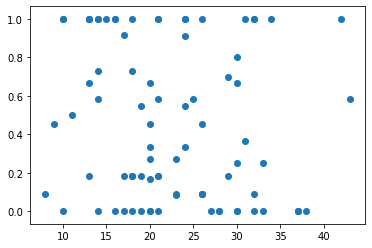

[[64.98971496 -0.56931852]
 [-0.56931852  0.1602904 ]]
Spearmans correlation: -0.207
p value: 0.0604
Accept null hypothesis that the means are equal.


In [26]:
# prop_choicerej // aq
pyplot.scatter(aq['AQ'],rejchoice)
pyplot.show()
covariance = cov(aq['AQ'],rejchoice)
print(covariance)
corr, _ = spearmanr(aq['AQ'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],rejchoice)
print('p value: %.4f' % p)

alpha = .05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

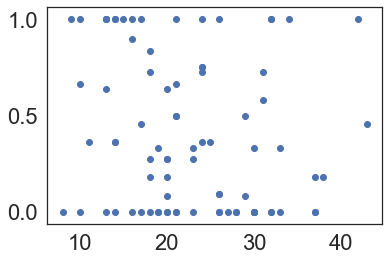

[[64.98971496 -0.61126301]
 [-0.61126301  0.1536419 ]]
Spearmans correlation: -0.207
p value: 0.0605
Accept null hypothesis that the means are equal.


In [37]:
# prop_choicerej // aq
pyplot.scatter(aq['AQ'],accchoice)
pyplot.show()
covariance = cov(aq['AQ'],accchoice)
print(covariance)
corr, _ = spearmanr(aq['AQ'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],accchoice)
print('p value: %.4f' % p)

alpha = .05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

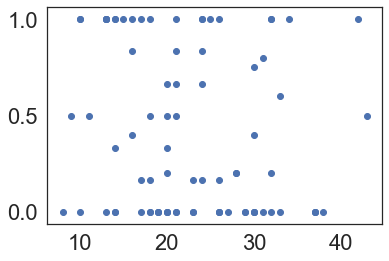

[[64.98971496 -0.56647811]
 [-0.56647811  0.17800772]]
Spearmans correlation: -0.185
p value: 0.0937
Accept null hypothesis that the means are equal.


In [38]:
# prop_choicerej // aq
pyplot.scatter(aq['AQ'],neuchoice)
pyplot.show()
covariance = cov(aq['AQ'],neuchoice)
print(covariance)
corr, _ = spearmanr(aq['AQ'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],neuchoice)
print('p value: %.4f' % p)

alpha = .05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

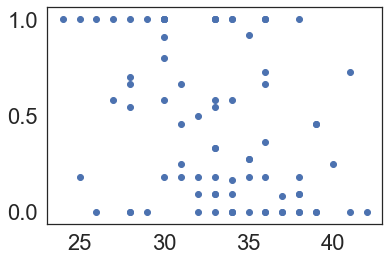

[[16.68645313 -0.5543097 ]
 [-0.5543097   0.1602904 ]]
Spearmans correlation: -0.337
p value: 0.0018
Reject the null hypothesis that the means are equal.


In [96]:
# prop_choicerej // ntbs
pyplot.scatter(ntbs['NTBS_score'],rejchoice)
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rejchoice)
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

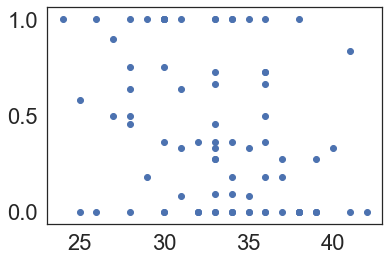

[[16.68645313 -0.5354716 ]
 [-0.5354716   0.1536419 ]]
Spearmans correlation: -0.346
p value: 0.0014
Reject the null hypothesis that the means are equal.


In [39]:
# prop_choicerej // ntbs
pyplot.scatter(ntbs['NTBS_score'],accchoice)
pyplot.show()
covariance = cov(ntbs['NTBS_score'],accchoice)
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

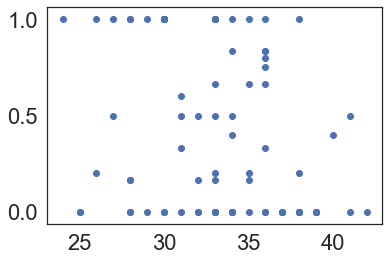

[[16.68645313 -0.45669997]
 [-0.45669997  0.17800772]]
Spearmans correlation: -0.287
p value: 0.0086
Reject the null hypothesis that the means are equal.


In [40]:
# prop_choicerej // ntbs
pyplot.scatter(ntbs['NTBS_score'],neuchoice)
pyplot.show()
covariance = cov(ntbs['NTBS_score'],neuchoice)
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

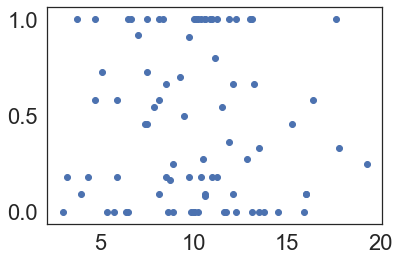

[[12.12875129 -0.07691089]
 [-0.07691089  0.1602904 ]]
Spearmans correlation: -0.044
p value: 0.6931
Accept null hypothesis that the means are equal.


In [97]:
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],rejchoice)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],rejchoice)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


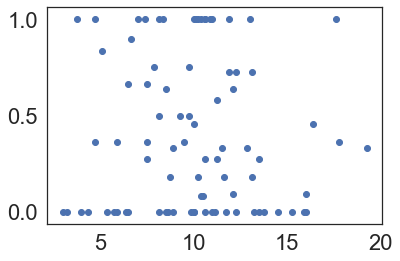

[[12.12875129 -0.06784463]
 [-0.06784463  0.1536419 ]]
Spearmans correlation: -0.037
p value: 0.7377
Accept null hypothesis that the means are equal.


In [52]:
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],accchoice)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],accchoice)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


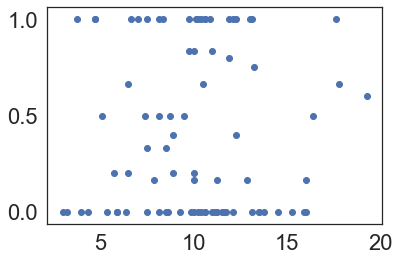

[[12.12875129  0.02453381]
 [ 0.02453381  0.17800772]]
Spearmans correlation: -0.022
p value: 0.8466
Accept null hypothesis that the means are equal.


In [42]:
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],neuchoice)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],neuchoice)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


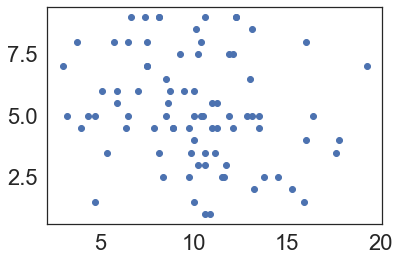

[[12.12875129 -1.5288624 ]
 [-1.5288624   4.8008375 ]]
Spearmans correlation: -0.234
p value: 0.0329
Reject the null hypothesis that the means are equal.


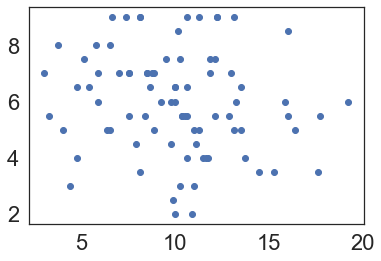

[[12.12875129 -0.9628361 ]
 [-0.9628361   3.27101087]]
Spearmans correlation: -0.176
p value: 0.1107
Accept null hypothesis that the means are equal.


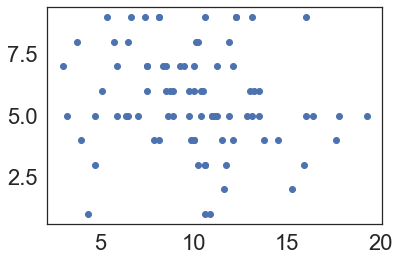

[[12.12875129 -1.14314575]
 [-1.14314575  4.14222745]]
Spearmans correlation: -0.199
p value: 0.0711
Accept null hypothesis that the means are equal.


In [69]:
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],rejstress)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],rejstress)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],rejstress)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],rejstress)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],accstress)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],accstress)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],accstress)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],accstress)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],neustress)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],neustress)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],neustress)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],neustress)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    



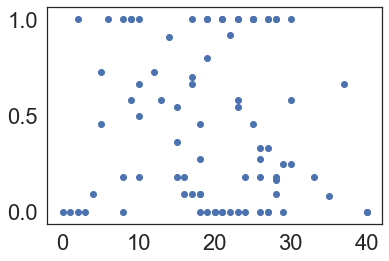

[[84.46635322 -0.27080985]
 [-0.27080985  0.1602904 ]]
Spearmans correlation: -0.057
p value: 0.6092
Accept null hypothesis that the means are equal.


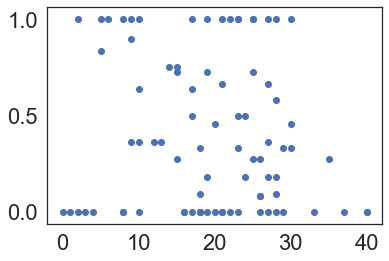

[[84.46635322 -0.45319081]
 [-0.45319081  0.1536419 ]]
Spearmans correlation: -0.076
p value: 0.4967
Accept null hypothesis that the means are equal.


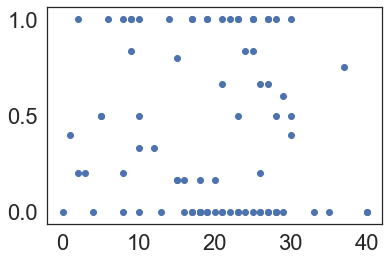

[[84.46635322 -0.33697473]
 [-0.33697473  0.17800772]]
Spearmans correlation: -0.114
p value: 0.3030
Accept null hypothesis that the means are equal.


In [53]:
# prop_choicerej // pss

pyplot.scatter(pss["PSS_score"],rejchoice)
pyplot.show()
covariance = cov(pss["PSS_score"],rejchoice)
print(covariance)
corr, _ = spearmanr(pss["PSS_score"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(pss["PSS_score"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // pss

pyplot.scatter(pss["PSS_score"],accchoice)
pyplot.show()
covariance = cov(pss["PSS_score"],accchoice)
print(covariance)
corr, _ = spearmanr(pss["PSS_score"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(pss["PSS_score"],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // pss

pyplot.scatter(pss["PSS_score"],neuchoice)
pyplot.show()
covariance = cov(pss["PSS_score"],neuchoice)
print(covariance)
corr, _ = spearmanr(pss["PSS_score"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(pss["PSS_score"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

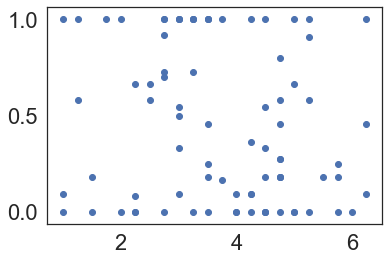

[[ 1.8008375  -0.09312294]
 [-0.09312294  0.1602904 ]]
Spearmans correlation: -0.156
p value: 0.1588
Accept null hypothesis that the means are equal.


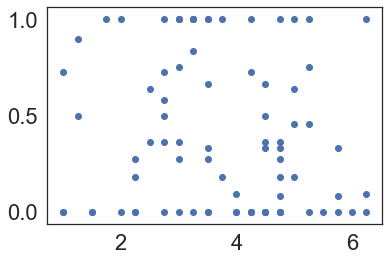

[[ 1.8008375 -0.0689198]
 [-0.0689198  0.1536419]]
Spearmans correlation: -0.111
p value: 0.3171
Accept null hypothesis that the means are equal.


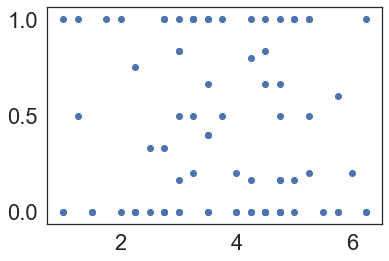

[[ 1.8008375  -0.03069167]
 [-0.03069167  0.17800772]]
Spearmans correlation: -0.020
p value: 0.8593
Accept null hypothesis that the means are equal.


In [43]:
# prop_choicerej // erq emotional suppression
pyplot.scatter(erq['ERQ_emosuppression'],rejchoice)
pyplot.show()
covariance = cov(erq['ERQ_emosuppression'],rejchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_emosuppression'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_emosuppression'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // erq emotional suppression
pyplot.scatter(erq['ERQ_emosuppression'],accchoice)
pyplot.show()
covariance = cov(erq['ERQ_emosuppression'],accchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_emosuppression'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_emosuppression'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

# prop_choicerej // erq emotional suppression
pyplot.scatter(erq['ERQ_emosuppression'],neuchoice)
pyplot.show()
covariance = cov(erq['ERQ_emosuppression'],neuchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_emosuppression'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_emosuppression'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

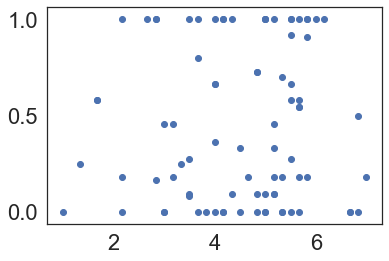

[[1.79945799 0.02043299]
 [0.02043299 0.1602904 ]]
Spearmans correlation: 0.049
p value: 0.6601
Accept null hypothesis that the means are equal.


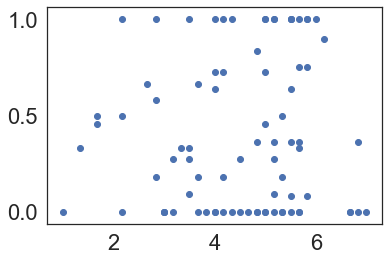

[[1.79945799 0.02896341]
 [0.02896341 0.1536419 ]]
Spearmans correlation: 0.071
p value: 0.5260
Accept null hypothesis that the means are equal.


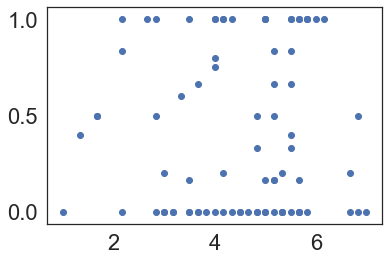

[[1.79945799 0.012229  ]
 [0.012229   0.17800772]]
Spearmans correlation: 0.062
p value: 0.5788
Accept null hypothesis that the means are equal.


In [44]:
# prop_choicerej // erq emotional cogreappraisal
pyplot.scatter(erq['ERQ_cogreappraisal'],rejchoice)
pyplot.show()
covariance = cov(erq['ERQ_cogreappraisal'],rejchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_cogreappraisal'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_cogreappraisal'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

# prop_choicerej // erq emotional cogreappraisal
pyplot.scatter(erq['ERQ_cogreappraisal'],accchoice)
pyplot.show()
covariance = cov(erq['ERQ_cogreappraisal'],accchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_cogreappraisal'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_cogreappraisal'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // erq emotional cogreappraisal
pyplot.scatter(erq['ERQ_cogreappraisal'],neuchoice)
pyplot.show()
covariance = cov(erq['ERQ_cogreappraisal'],neuchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_cogreappraisal'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_cogreappraisal'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')



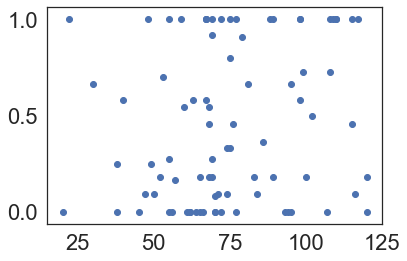

[[5.37141052e+02 1.73854576e+00]
 [1.73854576e+00 1.60290400e-01]]
Spearmans correlation: 0.205
p value: 0.0627
Accept null hypothesis that the means are equal.


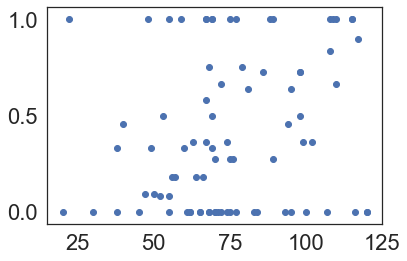

[[5.37141052e+02 2.00274001e+00]
 [2.00274001e+00 1.53641901e-01]]
Spearmans correlation: 0.182
p value: 0.1001
Accept null hypothesis that the means are equal.


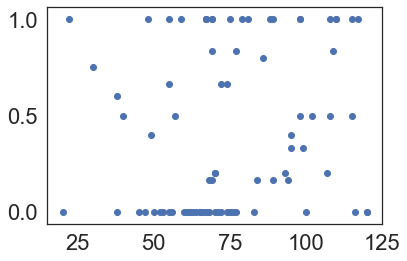

[[5.37141052e+02 1.71207023e+00]
 [1.71207023e+00 1.78007722e-01]]
Spearmans correlation: 0.236
p value: 0.0314
Reject the null hypothesis that the means are equal.


In [45]:
# prop_choicerej // scs

pyplot.scatter(scs["SCS_score"],rejchoice)
pyplot.show()
covariance = cov(scs["SCS_score"],rejchoice)
print(covariance)
corr, _ = spearmanr(scs["SCS_score"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs["SCS_score"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // scs

pyplot.scatter(scs["SCS_score"],accchoice)
pyplot.show()
covariance = cov(scs["SCS_score"],accchoice)
print(covariance)
corr, _ = spearmanr(scs["SCS_score"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs["SCS_score"],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // scs

pyplot.scatter(scs["SCS_score"],neuchoice)
pyplot.show()
covariance = cov(scs["SCS_score"],neuchoice)
print(covariance)
corr, _ = spearmanr(scs["SCS_score"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs["SCS_score"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

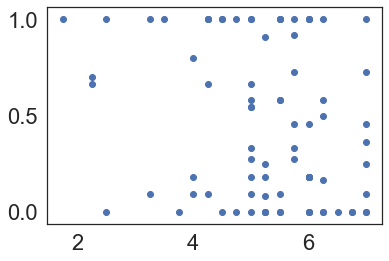

[[ 1.42126433 -0.11899828]
 [-0.11899828  0.1602904 ]]
Spearmans correlation: -0.233
p value: 0.0339
Reject the null hypothesis that the means are equal.


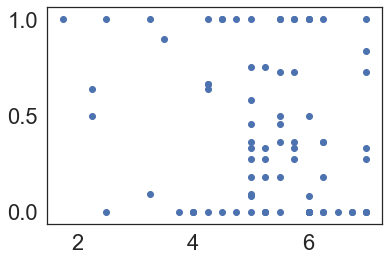

[[ 1.42126433 -0.08381024]
 [-0.08381024  0.1536419 ]]
Spearmans correlation: -0.159
p value: 0.1498
Accept null hypothesis that the means are equal.


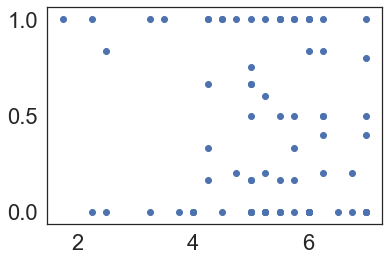

[[ 1.42126433 -0.0676315 ]
 [-0.0676315   0.17800772]]
Spearmans correlation: -0.098
p value: 0.3763
Accept null hypothesis that the means are equal.


In [46]:
# prop_choicerej // srq admiration

pyplot.scatter(srq["SRQ_admiration"],rejchoice)
pyplot.show()
covariance = cov(srq["SRQ_admiration"],rejchoice)
print(covariance)
corr, _ = spearmanr(srq["SRQ_admiration"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq["SRQ_admiration"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq admiration

pyplot.scatter(srq["SRQ_admiration"],accchoice)
pyplot.show()
covariance = cov(srq["SRQ_admiration"],accchoice)
print(covariance)
corr, _ = spearmanr(srq["SRQ_admiration"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq["SRQ_admiration"],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq admiration

pyplot.scatter(srq["SRQ_admiration"],neuchoice)
pyplot.show()
covariance = cov(srq["SRQ_admiration"],neuchoice)
print(covariance)
corr, _ = spearmanr(srq["SRQ_admiration"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq["SRQ_admiration"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

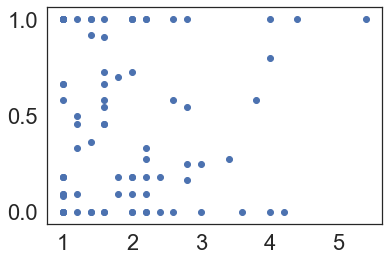

[[0.93310608 0.0113863 ]
 [0.0113863  0.1602904 ]]
Spearmans correlation: -0.025
p value: 0.8200
Accept null hypothesis that the means are equal.


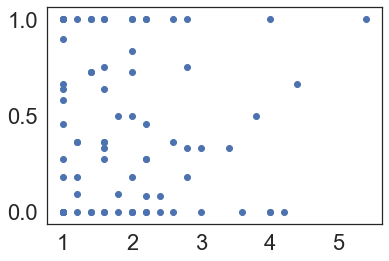

[[0.93310608 0.01140576]
 [0.01140576 0.1536419 ]]
Spearmans correlation: 0.029
p value: 0.7949
Accept null hypothesis that the means are equal.


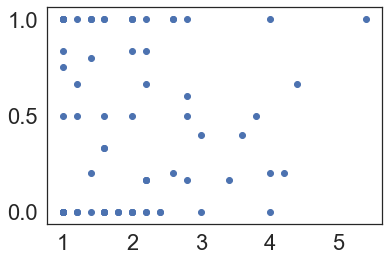

[[0.93310608 0.03197277]
 [0.03197277 0.17800772]]
Spearmans correlation: 0.110
p value: 0.3213
Accept null hypothesis that the means are equal.


In [47]:
# prop_choicerej // srq negsocpot

pyplot.scatter(srq['SRQ_negsocpot'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_negsocpot'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_negsocpot'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_negsocpot'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq negsocpot

pyplot.scatter(srq['SRQ_negsocpot'],accchoice)
pyplot.show()
covariance = cov(srq['SRQ_negsocpot'],accchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_negsocpot'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_negsocpot'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq negsocpot

pyplot.scatter(srq['SRQ_negsocpot'],neuchoice)
pyplot.show()
covariance = cov(srq['SRQ_negsocpot'],neuchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_negsocpot'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_negsocpot'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

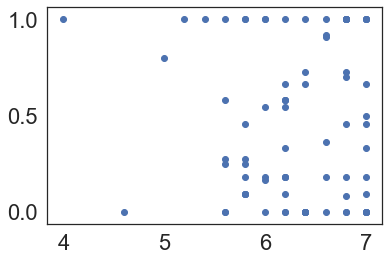

[[ 0.35646195 -0.00364255]
 [-0.00364255  0.1602904 ]]
Spearmans correlation: -0.008
p value: 0.9409
Accept null hypothesis that the means are equal.


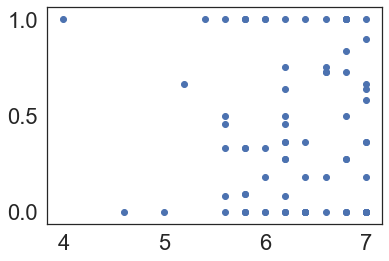

[[ 0.35646195 -0.00636003]
 [-0.00636003  0.1536419 ]]
Spearmans correlation: -0.036
p value: 0.7446
Accept null hypothesis that the means are equal.


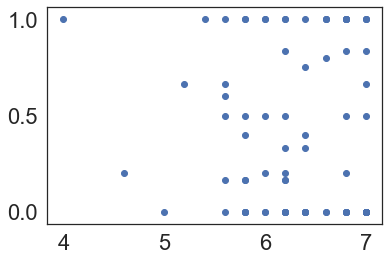

[[ 0.35646195 -0.01291459]
 [-0.01291459  0.17800772]]
Spearmans correlation: -0.081
p value: 0.4642
Accept null hypothesis that the means are equal.


In [48]:
# prop_choicerej // srq prosocint

pyplot.scatter(srq['SRQ_prosocint'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_prosocint'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_prosocint'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_prosocint'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq prosocint

pyplot.scatter(srq['SRQ_prosocint'],accchoice)
pyplot.show()
covariance = cov(srq['SRQ_prosocint'],accchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_prosocint'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_prosocint'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq prosocint

pyplot.scatter(srq['SRQ_prosocint'],neuchoice)
pyplot.show()
covariance = cov(srq['SRQ_prosocint'],neuchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_prosocint'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_prosocint'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

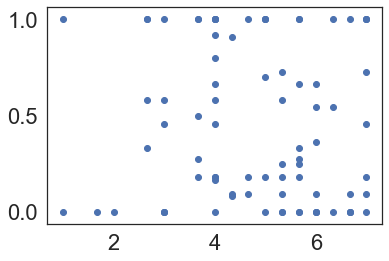

[[ 2.21771639 -0.04604352]
 [-0.04604352  0.1602904 ]]
Spearmans correlation: -0.098
p value: 0.3778
Accept null hypothesis that the means are equal.


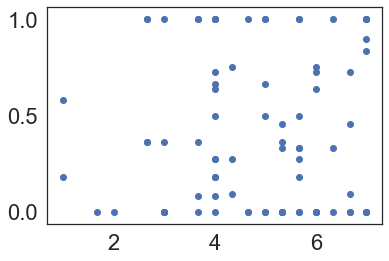

[[2.21771639 0.01408056]
 [0.01408056 0.1536419 ]]
Spearmans correlation: -0.025
p value: 0.8203
Accept null hypothesis that the means are equal.


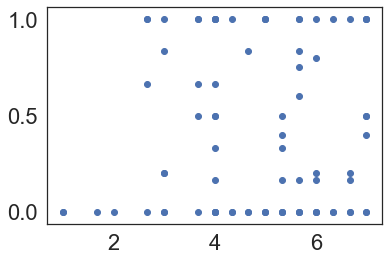

[[2.21771639 0.02300095]
 [0.02300095 0.17800772]]
Spearmans correlation: 0.012
p value: 0.9112
Accept null hypothesis that the means are equal.


In [49]:
# prop_choicerej // srq sexrel

pyplot.scatter(srq['SRQ_sexrel'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_sexrel'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sexrel'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sexrel'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq sexrel

pyplot.scatter(srq['SRQ_sexrel'],accchoice)
pyplot.show()
covariance = cov(srq['SRQ_sexrel'],accchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sexrel'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sexrel'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq sexrel

pyplot.scatter(srq['SRQ_sexrel'],neuchoice)
pyplot.show()
covariance = cov(srq['SRQ_sexrel'],neuchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sexrel'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sexrel'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

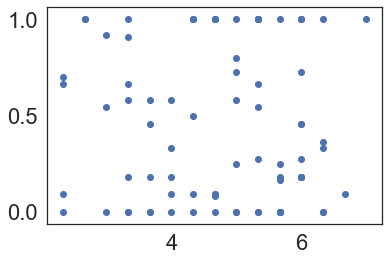

[[ 1.40131257 -0.01104143]
 [-0.01104143  0.1602904 ]]
Spearmans correlation: 0.001
p value: 0.9923
Accept null hypothesis that the means are equal.


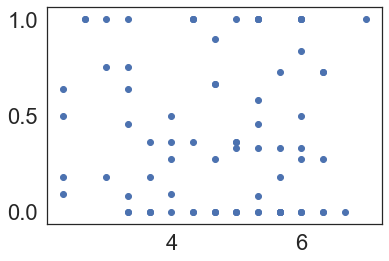

[[ 1.40131257 -0.01389542]
 [-0.01389542  0.1536419 ]]
Spearmans correlation: -0.063
p value: 0.5721
Accept null hypothesis that the means are equal.


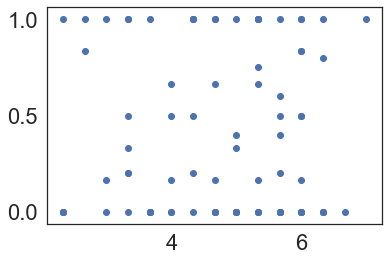

[[1.40131257 0.00509844]
 [0.00509844 0.17800772]]
Spearmans correlation: -0.018
p value: 0.8735
Accept null hypothesis that the means are equal.


In [50]:
# prop_choicerej // srq sociability

pyplot.scatter(srq['SRQ_sociability'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_sociability'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sociability'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sociability'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq sociability

pyplot.scatter(srq['SRQ_sociability'],accchoice)
pyplot.show()
covariance = cov(srq['SRQ_sociability'],accchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sociability'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sociability'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq sociability

pyplot.scatter(srq['SRQ_sociability'],neuchoice)
pyplot.show()
covariance = cov(srq['SRQ_sociability'],neuchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sociability'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sociability'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

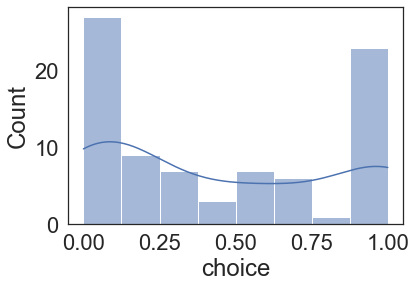

In [107]:
sns.histplot(data= rejchoice, kde=True)

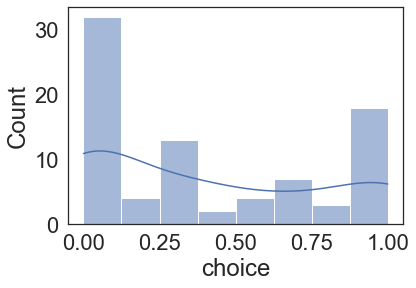

In [108]:
sns.histplot(data= accchoice, kde=True)

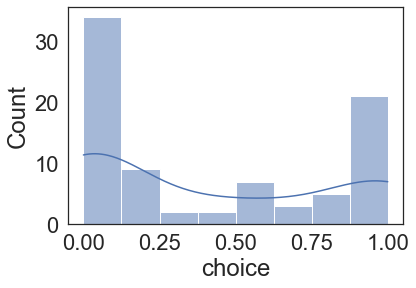

In [109]:
sns.histplot(data= neuchoice, kde=True)

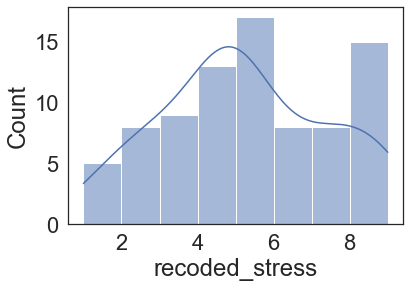

In [57]:
sns.histplot(data= rejstress, kde=True)

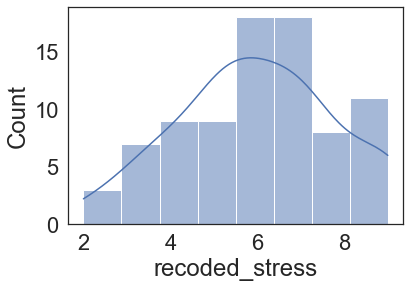

In [58]:
sns.histplot(data= accstress, kde=True)

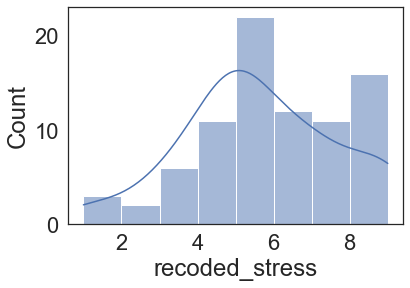

In [59]:
sns.histplot(data= neustress, kde=True)

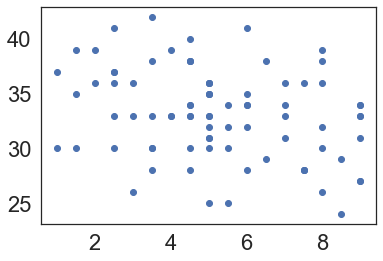

[[ 4.8008375  -2.57346459]
 [-2.57346459 16.68645313]]
Spearmans correlation: -0.283
p value: 0.0096
Reject the null hypothesis that the means are equal.


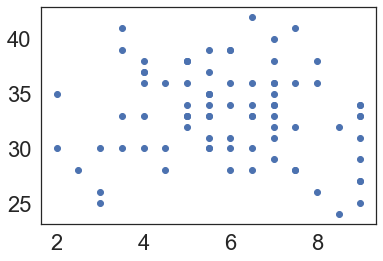

[[ 3.27101087 -0.85645019]
 [-0.85645019 16.68645313]]
Spearmans correlation: -0.118
p value: 0.2885
Accept null hypothesis that the means are equal.


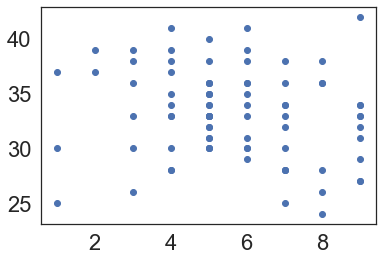

[[ 4.14222745 -1.36849838]
 [-1.36849838 16.68645313]]
Spearmans correlation: -0.193
p value: 0.0812
Accept null hypothesis that the means are equal.


In [55]:
# rejstress // ntbs
pyplot.scatter(rejstress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(rejstress, ntbs['NTBS_score'])
print(covariance)
corr, _ = spearmanr(rejstress, ntbs['NTBS_score'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejstress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

# rejstress // ntbs
pyplot.scatter(accstress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(accstress, ntbs['NTBS_score'])
print(covariance)
corr, _ = spearmanr(accstress, ntbs['NTBS_score'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(accstress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# rejstress // ntbs
pyplot.scatter(neustress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(neustress, ntbs['NTBS_score'])
print(covariance)
corr, _ = spearmanr(neustress, ntbs['NTBS_score'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(neustress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


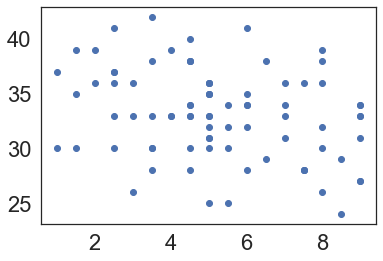

[[ 4.8008375  -2.57346459]
 [-2.57346459 16.68645313]]
Pearsons correlation: -0.288
p value: 0.0084
Reject the null hypothesis that the means are equal.


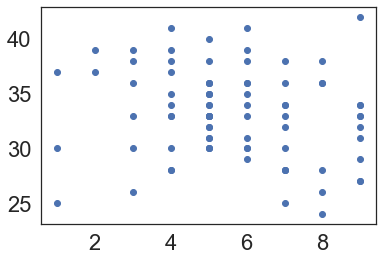

[[ 4.14222745 -1.36849838]
 [-1.36849838 16.68645313]]
Pearsons correlation: -0.165
p value: 0.1370
Accept null hypothesis that the means are equal.


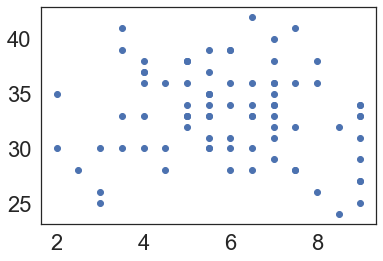

[[ 3.27101087 -0.85645019]
 [-0.85645019 16.68645313]]
Pearsons correlation: -0.116
p value: 0.2967
Accept null hypothesis that the means are equal.


In [60]:
#rejstress // ntbs
pyplot.scatter(rejstress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(rejstress, ntbs['NTBS_score'])
print(covariance)
corr, _ = pearsonr(rejstress, ntbs['NTBS_score'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejstress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
#rejstress // ntbs
pyplot.scatter(neustress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(neustress, ntbs['NTBS_score'])
print(covariance)
corr, _ = pearsonr(neustress, ntbs['NTBS_score'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(neustress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
#rejstress // ntbs
pyplot.scatter(accstress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(accstress, ntbs['NTBS_score'])
print(covariance)
corr, _ = pearsonr(accstress, ntbs['NTBS_score'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(accstress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

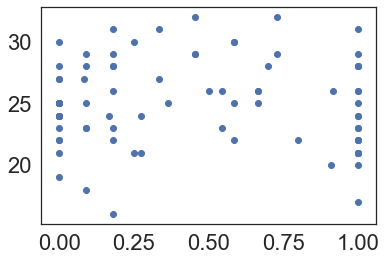

[[ 0.1602904 -0.0665253]
 [-0.0665253 12.1827799]]
Spearmansr correlation: -0.027
p value: 0.8056
Accept null hypothesis that the means are equal.


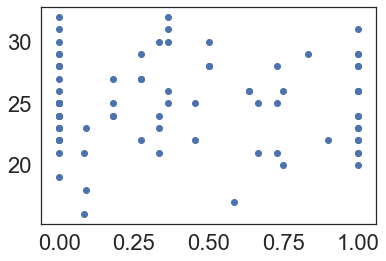

[[ 0.1536419  -0.02091737]
 [-0.02091737 12.1827799 ]]
Spearmansr correlation: -0.017
p value: 0.8800
Accept null hypothesis that the means are equal.


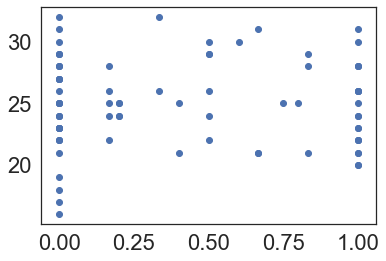

[[1.78007722e-01 5.20374180e-03]
 [5.20374180e-03 1.21827799e+01]]
Spearmansr correlation: -0.017
p value: 0.8787
Accept null hypothesis that the means are equal.


In [61]:
# prop_choicerej // rr
pyplot.scatter(rejchoice, rr['RR_score'])
pyplot.show()
covariance = cov(rejchoice, rr['RR_score'])
print(covariance)
corr, _ = spearmanr(rejchoice, rr['RR_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejchoice, rr['RR_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // rr
pyplot.scatter(accchoice, rr['RR_score'])
pyplot.show()
covariance = cov(accchoice, rr['RR_score'])
print(covariance)
corr, _ = spearmanr(accchoice, rr['RR_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(accchoice, rr['RR_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // rr
pyplot.scatter(neuchoice, rr['RR_score'])
pyplot.show()
covariance = cov(neuchoice, rr['RR_score'])
print(covariance)
corr, _ = spearmanr(neuchoice, rr['RR_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(neuchoice, rr['RR_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

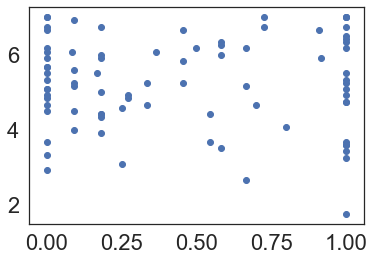

[[ 0.1602904  -0.00539265]
 [-0.00539265  1.45284798]]
Spearmansr correlation: 0.011
p value: 0.9244
Accept null hypothesis that the means are equal.


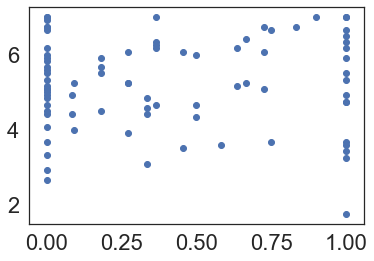

[[0.1536419  0.01525066]
 [0.01525066 1.45284798]]
Spearmansr correlation: 0.056
p value: 0.6172
Accept null hypothesis that the means are equal.


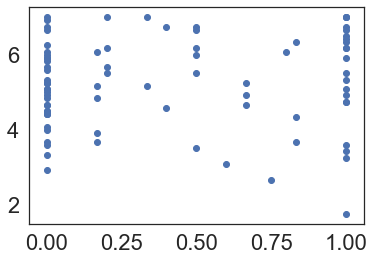

[[0.17800772 0.0314055 ]
 [0.0314055  1.45284798]]
Spearmansr correlation: 0.141
p value: 0.2039
Accept null hypothesis that the means are equal.


In [62]:
# prop_choicerej // mspss
pyplot.scatter(rejchoice, mspss['MSPSS_score'])
pyplot.show()
covariance = cov(rejchoice, mspss['MSPSS_score'])
print(covariance)
corr, _ = spearmanr(rejchoice, mspss['MSPSS_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejchoice, mspss['MSPSS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // mspss
pyplot.scatter(accchoice, mspss['MSPSS_score'])
pyplot.show()
covariance = cov(accchoice, mspss['MSPSS_score'])
print(covariance)
corr, _ = spearmanr(accchoice, mspss['MSPSS_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(accchoice, mspss['MSPSS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

# prop_choicerej // mspss
pyplot.scatter(neuchoice, mspss['MSPSS_score'])
pyplot.show()
covariance = cov(neuchoice, mspss['MSPSS_score'])
print(covariance)
corr, _ = spearmanr(neuchoice, mspss['MSPSS_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(neuchoice, mspss['MSPSS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [119]:
ntbschoicescatter = pd.DataFrame()
ntbschoicescatter['ntbs_'] = ntbs['NTBS_score']
ntbschoicescatter['rejchoice_'] = rejchoice


In [116]:
print(ntbschoicescatter)

    ntbs_  rejchoice_
0      34    1.000000
1      31    0.250000
2      38    0.090909
3      32    0.500000
4      30    1.000000
..    ...         ...
78     32    0.000000
79     33    0.545455
80     36    0.666667
81     34    1.000000
82     34    0.166667

[83 rows x 2 columns]


In [87]:
#r = scipy.stats.pearsonr(x=ntbschoicescatter.ntbs, y=ntbschoicescatter.rejchoice)[0]
#scatterntbschoice = sns.scatterplot(data=ntbschoicescatter, x=ntbschoicescatter.ntbs, y=ntbschoicescatter.rejchoice)
#scatterntbschoice.set_title('Need to Belong and Choice')
#scatterntbschoice= plt.text(24, .8, 'r = ' + str(round(r, 2)))
#plt.savefig('ntbschoicescatterplot.png')


In [61]:
ntbsstressscatter = pd.DataFrame()
ntbsstressscatter['ntbs_'] = ntbs['NTBS_score']
ntbsstressscatter['rejstress_'] = rej['recoded_stress']
print(ntbsstressscatter)


    ntbs_  rejstress_
0      34         4.5
1      31         7.0
2      38         4.5
3      32         6.0
4      30         8.0
..    ...         ...
78     32         5.0
79     33         2.5
80     36         2.0
81     34         9.0
82     34         6.0

[83 rows x 2 columns]


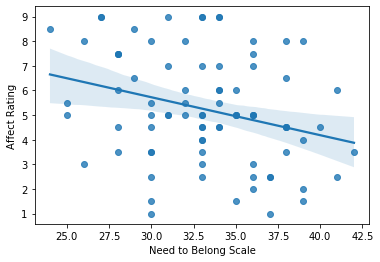

In [62]:
r = scipy.stats.pearsonr(x=ntbsstressscatter.ntbs_, y=ntbsstressscatter.rejstress_)[0]
ntbs_stress_scatter = sns.regplot(x= "ntbs_", y= "rejstress_", data= ntbsstressscatter)
ntbs_stress_scatter.set_ylabel('Affect Rating')
ntbs_stress_scatter.set_xlabel('Need to Belong Scale')
#ntbs_stress_scatter.text(24, 1.5, 'r = ' + str(round(r, 2)))
plt.savefig('ntbs_stress_scatter.png', bbox_inches='tight')


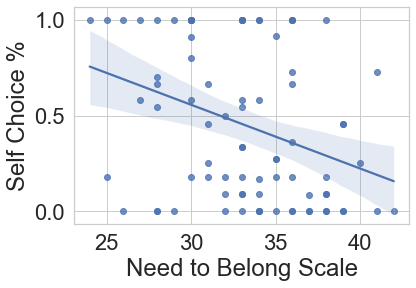

In [127]:
r = scipy.stats.spearmanr(a=ntbschoicescatter.ntbs_, b=ntbschoicescatter.rejchoice_)[0]
scatterntbschoice = sns.regplot(x= "ntbs_", y= "rejchoice_", data= ntbschoicescatter)
scatterntbschoice.set_ylabel('Self Choice %')
scatterntbschoice.set_xlabel('Need to Belong Scale')
#scatterntbschoice= plt.text(24, .85, 'r = ' + str(round(r, 2)))
plt.savefig('ntbs_choice_scatterplot.png',bbox_inches='tight')

In [64]:
ntbssaliencescatter = pd.DataFrame()
ntbssaliencescatter['ntbs_'] = ntbs['NTBS_score']
ntbssaliencescatter['salience_'] = rej['salience_mean']
print(ntbsstressscatter)

    ntbs_  rejstress_
0      34         4.5
1      31         7.0
2      38         4.5
3      32         6.0
4      30         8.0
..    ...         ...
78     32         5.0
79     33         2.5
80     36         2.0
81     34         9.0
82     34         6.0

[83 rows x 2 columns]


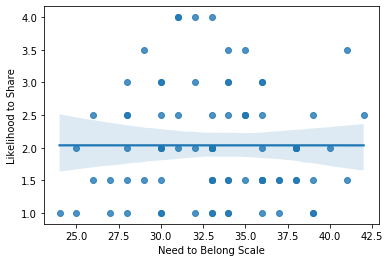

In [65]:
r = scipy.stats.pearsonr(x=ntbschoicescatter.ntbs_, y=ntbschoicescatter.rejchoice_)[0]
scatterntbssalience = sns.regplot(x= "ntbs_", y= "salience_", data= ntbssaliencescatter)
scatterntbssalience.set_ylabel('Likelihood to Share')
scatterntbssalience.set_xlabel('Need to Belong Scale')
#scatterntbssalience= plt.text(24, 3.5, 'r = ' + str(round(r, 2)))
plt.savefig('ntbs_salience_scatterplot.png',bbox_inches='tight')

In [115]:
aqchoicescatter = pd.DataFrame()
aqchoicescatter['AQ_'] = aq['AQ']
aqchoicescatter['rejchoice_'] = rejchoice
print(aqchoicescatter)

     AQ_  rejchoice_
0   24.0    1.000000
1   33.0    0.250000
2   32.0    0.090909
3   11.0    0.500000
4   21.0    1.000000
..   ...         ...
78  30.0    0.000000
79  19.0    0.545455
80  30.0    0.666667
81  10.0    1.000000
82  20.0    0.166667

[83 rows x 2 columns]


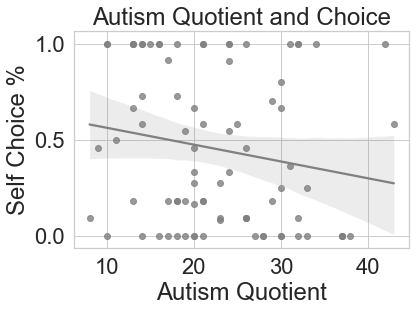

In [125]:
r = scipy.stats.spearmanr(a=aqchoicescatter.AQ_, b=aqchoicescatter.rejchoice_)[0]
scatter_aq_choice = sns.regplot(x= "AQ_", y= "rejchoice_", data= aqchoicescatter,scatter_kws={"color": "gray"}, line_kws={"color": "gray"})
scatter_aq_choice.set_title('Autism Quotient and Choice')
scatter_aq_choice.set_ylabel('Self Choice %')
scatter_aq_choice.set_xlabel('Autism Quotient')
#scatter_aq_choice= plt.text(9.5, .82, 'r = ' + str(round(r, 2)))
plt.savefig('aq_choice_scatterplot.png',bbox_inches='tight')

In [129]:
srqadmirationchoicescatter = pd.DataFrame()
srqadmirationchoicescatter['SRQ_admiration_'] = srq['SRQ_admiration']
srqadmirationchoicescatter['rejchoice_'] = rejchoice
print(srqadmirationchoicescatter)

    SRQ_admiration_  rejchoice_
0              2.50    1.000000
1              5.25    0.250000
2              4.00    0.090909
3              6.25    0.500000
4              6.00    1.000000
..              ...         ...
78             6.00    0.000000
79             5.00    0.545455
80             5.00    0.666667
81             7.00    1.000000
82             6.25    0.166667

[83 rows x 2 columns]


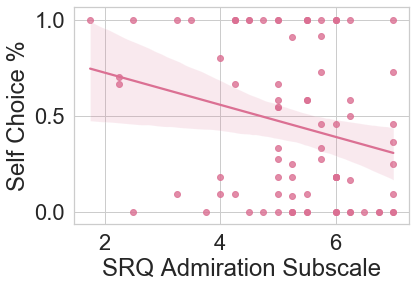

In [131]:
r = scipy.stats.spearmanr(a=srqadmirationchoicescatter.SRQ_admiration_, b=srqadmirationchoicescatter.rejchoice_)[0]
scatter_srqadmiration_choice = sns.regplot(x= "SRQ_admiration_", y= "rejchoice_", data= srqadmirationchoicescatter, scatter_kws={"color": "palevioletred"}, line_kws={"color": "palevioletred"})
scatter_srqadmiration_choice.set_ylabel('Self Choice %')
scatter_srqadmiration_choice.set_xlabel('SRQ Admiration Subscale')
#scatter_srqadmiration_choice= plt.text(2, .82, 'r = ' + str(round(r, 2)))
plt.savefig('srqadmiration_choice_scatterplot.png', bbox_inches='tight')

In [70]:
#affect ratings in rejection condition
rejstress_mean = rej['recoded_stress'].mean()
rejstress_std = rej['recoded_stress'].std()
print('rejstress_mean')
print(rejstress_mean)
print('rejstress_std')
print(rejstress_std)

rejstress_mean
5.234939759036145
rejstress_std
2.1910813531968114


In [71]:
#affect ratings in neutral condition
neustress_mean = neu['recoded_stress'].mean()
neustress_std = neu['recoded_stress'].std()
print('neustress_mean')
print(neustress_mean)
print('neustress_std')
print(neustress_std)

neustress_mean
5.614457831325301
neustress_std
2.0352462864161796


In [72]:
#affect ratings in acceptance condition
accstress_mean = acc['recoded_stress'].mean()
accstress_std = acc['recoded_stress'].std()
print('accstress_mean')
print(accstress_mean)
print('accstress_std')
print(accstress_std)

accstress_mean
5.981927710843373
accstress_std
1.8085936173611061


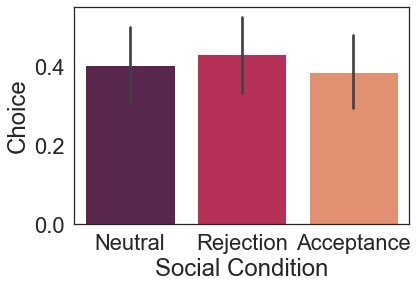

In [77]:
#sns.set(font_scale=2)
#plt.figure(figsize=(10,6))
choiceplot = sns.barplot(x='Social Condition', y='Choice', palette='rocket',data= plottingdata)#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
#choiceplot.figure.savefig('ANOVA_choiceplot.png',bbox_inches='tight')

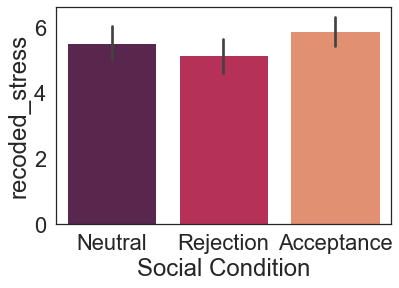

In [76]:
#sns.set(font_scale=2)
#plt.figure(figsize=(10,6))
choiceplot = sns.barplot(x='Social Condition', y='recoded_stress', data= plottingdata,palette= 'rocket')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Affect Rating')
#choiceplot.set_xlabel('Social Condition')
#choiceplot.set_ylim(1, 9)
#choiceplot.figure.savefig('ANOVA_affectplot.png',bbox_inches='tight')

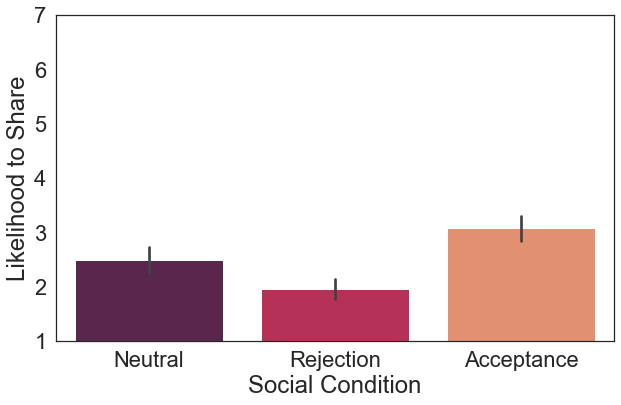

In [36]:
sns.set(font_scale=2)
sns.set_style('white')
plt.figure(figsize=(10,6))
choiceplot = sns.barplot(x='Social Condition', y='salience_mean', data= plottingdata,palette= 'rocket') #errorbar=('ci', 68))
choiceplot.set_ylabel('Likelihood to Share')
choiceplot.set_xlabel('Social Condition')
choiceplot.set_ylim(1, 7)
choiceplot.figure.savefig('ANOVA_sharingplot.png',bbox_inches='tight')

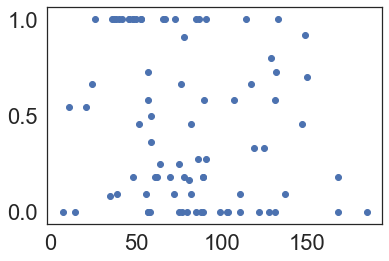

[[ 1.49413077e+03 -3.24988958e+00]
 [-3.24988958e+00  1.60290400e-01]]
Spearmans correlation: -0.245
p value: 0.0255
Reject the null hypothesis that the means are equal.


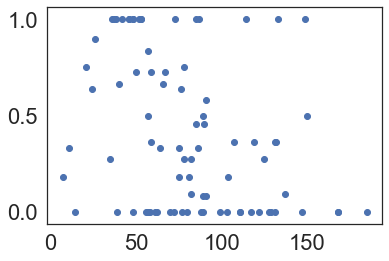

[[ 1.49413077e+03 -4.96421050e+00]
 [-4.96421050e+00  1.53641901e-01]]
Spearmans correlation: -0.333
p value: 0.0021
Reject the null hypothesis that the means are equal.


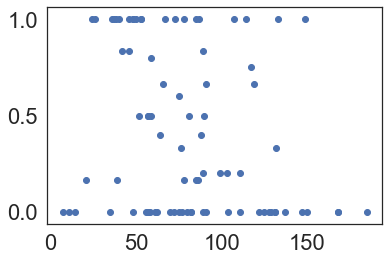

[[ 1.49413077e+03 -4.31709276e+00]
 [-4.31709276e+00  1.78007722e-01]]
Spearmans correlation: -0.270
p value: 0.0137
Reject the null hypothesis that the means are equal.


In [63]:
pyplot.scatter(LSAS["LSAS_total"],rejchoice)
pyplot.show()
covariance = cov(LSAS["LSAS_total"],rejchoice)
print(covariance)
corr, _ = spearmanr(LSAS["LSAS_total"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(LSAS["LSAS_total"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(LSAS["LSAS_total"],accchoice)
pyplot.show()
covariance = cov(LSAS["LSAS_total"],accchoice)
print(covariance)
corr, _ = spearmanr(LSAS["LSAS_total"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(LSAS["LSAS_total"],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(LSAS["LSAS_total"],neuchoice)
pyplot.show()
covariance = cov(LSAS["LSAS_total"],neuchoice)
print(covariance)
corr, _ = spearmanr(LSAS["LSAS_total"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(LSAS["LSAS_total"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

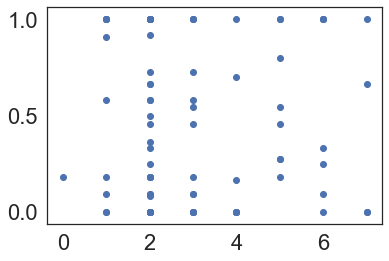

[[3.00852189e+00 2.97954568e-03]
 [2.97954568e-03 1.60290400e-01]]
Spearmans correlation: -0.027
p value: 0.8067
Accept null hypothesis that the means are equal.


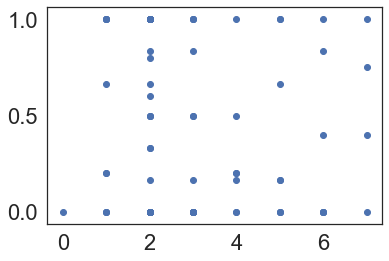

[[ 3.00852189 -0.03698942]
 [-0.03698942  0.17800772]]
Spearmans correlation: -0.074
p value: 0.5065
Accept null hypothesis that the means are equal.


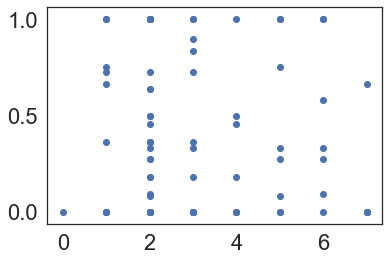

[[ 3.00852189 -0.04222544]
 [-0.04222544  0.1536419 ]]
Spearmans correlation: -0.061
p value: 0.5847
Accept null hypothesis that the means are equal.


In [64]:
pyplot.scatter(DII["DII_dysfuntionalimpulsivity"],rejchoice)
pyplot.show()
covariance = cov(DII["DII_dysfuntionalimpulsivity"],rejchoice)
print(covariance)
corr, _ = spearmanr(DII["DII_dysfuntionalimpulsivity"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(DII["DII_dysfuntionalimpulsivity"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(DII["DII_dysfuntionalimpulsivity"],neuchoice)
pyplot.show()
covariance = cov(DII["DII_dysfuntionalimpulsivity"],neuchoice)
print(covariance)
corr, _ = spearmanr(DII["DII_dysfuntionalimpulsivity"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(DII["DII_dysfuntionalimpulsivity"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(DII["DII_dysfuntionalimpulsivity"],accchoice)
pyplot.show()
covariance = cov(DII["DII_dysfuntionalimpulsivity"],accchoice)
print(covariance)
corr, _ = spearmanr(DII["DII_dysfuntionalimpulsivity"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(DII["DII_dysfuntionalimpulsivity"],accchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

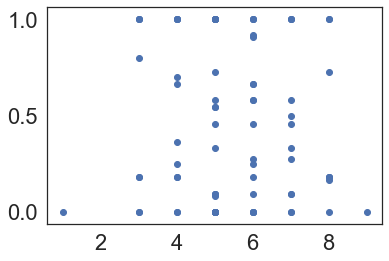

[[ 2.39759036 -0.02738871]
 [-0.02738871  0.1602904 ]]
Spearmans correlation: -0.034
p value: 0.7582
Accept null hypothesis that the means are equal.


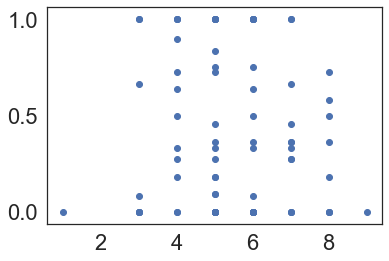

[[ 2.39759036 -0.03807892]
 [-0.03807892  0.1536419 ]]
Spearmans correlation: -0.053
p value: 0.6351
Accept null hypothesis that the means are equal.


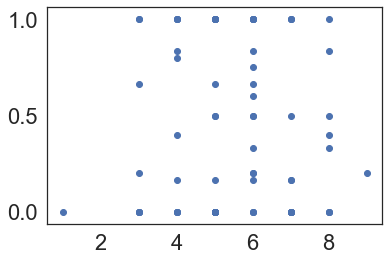

[[2.39759036e+00 3.84464688e-04]
 [3.84464688e-04 1.78007722e-01]]
Spearmans correlation: 0.026
p value: 0.8149
Accept null hypothesis that the means are equal.


In [65]:
pyplot.scatter(DII["DII_functionalimpulsivity"],rejchoice)
pyplot.show()
covariance = cov(DII["DII_functionalimpulsivity"],rejchoice)
print(covariance)
corr, _ = spearmanr(DII["DII_functionalimpulsivity"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(DII["DII_functionalimpulsivity"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(DII["DII_functionalimpulsivity"],accchoice)
pyplot.show()
covariance = cov(DII["DII_functionalimpulsivity"],accchoice)
print(covariance)
corr, _ = spearmanr(DII["DII_functionalimpulsivity"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(DII["DII_functionalimpulsivity"],accchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(DII["DII_functionalimpulsivity"],neuchoice)
pyplot.show()
covariance = cov(DII["DII_functionalimpulsivity"],neuchoice)
print(covariance)
corr, _ = spearmanr(DII["DII_functionalimpulsivity"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(DII["DII_functionalimpulsivity"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

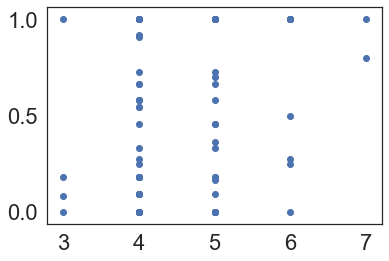

[[0.71466353 0.10745154]
 [0.10745154 0.1602904 ]]
Spearmans correlation: 0.307
p value: 0.0048
Reject the null hypothesis that the means are equal.


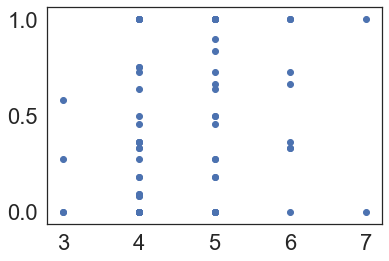

[[0.71466353 0.09814914]
 [0.09814914 0.1536419 ]]
Spearmans correlation: 0.306
p value: 0.0049
Reject the null hypothesis that the means are equal.


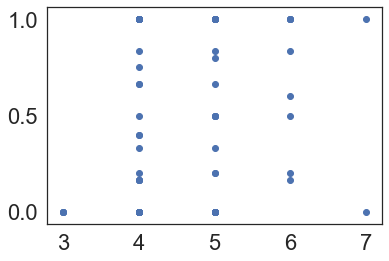

[[0.71466353 0.11384318]
 [0.11384318 0.17800772]]
Spearmans correlation: 0.345
p value: 0.0014
Reject the null hypothesis that the means are equal.


In [66]:
pyplot.scatter(dast["DAST_score"],rejchoice)
pyplot.show()
covariance = cov(dast["DAST_score"],rejchoice)
print(covariance)
corr, _ = spearmanr(dast["DAST_score"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(dast["DAST_score"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(dast["DAST_score"],accchoice)
pyplot.show()
covariance = cov(dast["DAST_score"],accchoice)
print(covariance)
corr, _ = spearmanr(dast["DAST_score"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(dast["DAST_score"],accchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(dast["DAST_score"],neuchoice)
pyplot.show()
covariance = cov(dast["DAST_score"],neuchoice)
print(covariance)
corr, _ = spearmanr(dast["DAST_score"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(dast["DAST_score"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [88]:
updatedchoicedata['conditionstress_intterm'] = updatedchoicedata['condition_recode'] * updatedchoicedata['recoded_stress']
print(updatedchoicedata['conditionstress_intterm'])

0       0.0
1       4.5
2      10.0
3       0.0
4       7.0
       ... 
244     9.0
245    18.0
246     0.0
247     6.0
248    14.0
Name: conditionstress_intterm, Length: 249, dtype: float64


In [33]:
# We'll add a second predictor: the party size
lm = pg.linear_regression(updatedchoicedata[['condition_recode', 'recoded_stress','conditionstress_intterm']], updatedchoicedata['choice'])
print(lm)



              names      coef        se         T      pval        r2  \
0         Intercept  0.189787  0.115204  1.647405  0.100757  0.063095   
1  condition_recode -0.052699  0.097789 -0.538908  0.590439  0.063095   
2    recoded_stress  0.043133  0.019376  2.226065  0.026920  0.063095   
3           intterm  0.007064  0.015985  0.441900  0.658951  0.063095   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.051622 -0.037129   0.416703  
1  0.051622 -0.245313   0.139915  
2  0.051622  0.004968   0.081299  
3  0.051622 -0.024422   0.038549  


In [32]:
print(updatedchoicedata)

                  PROLIFIC_ID  condition_recode  afterstresschange  \
0    568d286ab5a2c2000cb6a91c                 0                1.0   
1    568d286ab5a2c2000cb6a91c                 1                1.0   
2    568d286ab5a2c2000cb6a91c                 2                1.0   
3    595727bd7c76640001aa8f6e                 0                1.0   
4    595727bd7c76640001aa8f6e                 1                1.0   
..                        ...               ...                ...   
244  641361334c91a0c6ff4c5b79                 1                1.0   
245  641361334c91a0c6ff4c5b79                 2                1.0   
246  641a3df3c874807a1a8734bc                 0                1.0   
247  641a3df3c874807a1a8734bc                 1                1.0   
248  641a3df3c874807a1a8734bc                 2                1.0   

     salience_mean  stress_mean  recoded_stress    choice  rej-acc  \
0              4.0          5.0             5.0  0.833333     -0.5   
1              1.5 

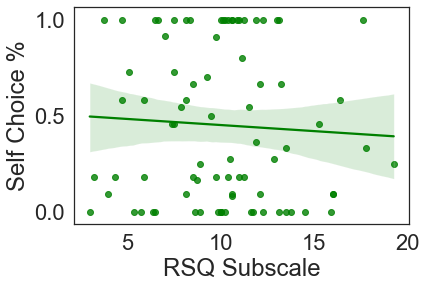

In [78]:
rsqchoicescatter_rej = pd.DataFrame()
rsqchoicescatter_rej['rsq_'] = rsq['RSQ_finalscore']
rsqchoicescatter_rej['rejchoice_'] = rejchoice
r = scipy.stats.spearmanr(a=rsqchoicescatter.rsq_, b=rsqchoicescatter.rejchoice_)[0]
scatter_rsq_rejchoice = sns.regplot(x= "rsq_", y= "rejchoice_", data= rsqchoicescatter, scatter_kws={"color": "green"}, line_kws={"color": "green"})
scatter_rsq_rejchoice.set_ylabel('Self Choice %')
scatter_rsq_rejchoice.set_xlabel('RSQ Subscale')
#scatter_srqadmiration_choice= plt.text(2, .82, 'r = ' + str(round(r, 2)))
plt.savefig('rsq_rejchoice_scatterplot.png', bbox_inches='tight')

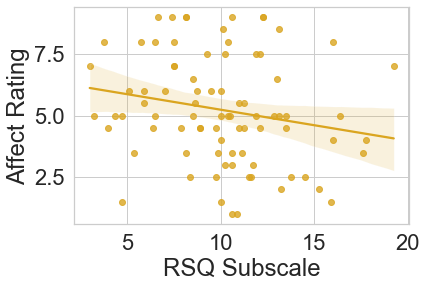

In [151]:
rsqaffectscatter_rej = pd.DataFrame()
rsqaffectscatter_rej['rsq_'] = rsq['RSQ_finalscore']
rsqaffectscatter_rej['rejstress_'] = rejstress
r = scipy.stats.spearmanr(a=rsqaffectscatter_rej.rsq_, b=rsqaffectscatter_rej.rejstress_)[0]
scatter_rsq_rejchoice = sns.regplot(x= "rsq_", y= "rejstress_", data= rsqaffectscatter_rej, scatter_kws={"color": "goldenrod"}, line_kws={"color": "goldenrod"})
scatter_rsq_rejchoice.set_ylabel('Affect Rating')
scatter_rsq_rejchoice.set_xlabel('RSQ Subscale')
#scatter_srqadmiration_choice= plt.text(2, .82, 'r = ' + str(round(r, 2)))
plt.savefig('rsqaffectscatter_scatterplot.png', bbox_inches='tight')

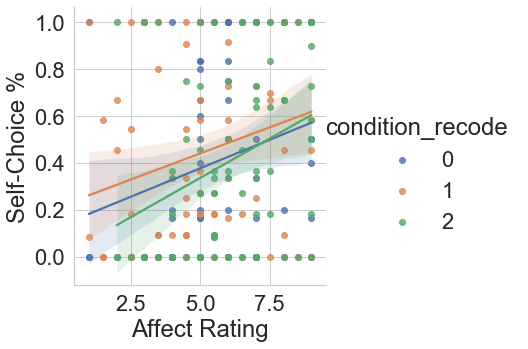

In [103]:
sns.set_style('whitegrid')
mlm= sns.lmplot(x ='recoded_stress', y ='choice', data = updatedchoicedata, hue= 'condition_recode')
mlm.set_axis_labels("Affect Rating", "Self-Choice %")
plt.savefig('mlm_affect.png', bbox_inches='tight')




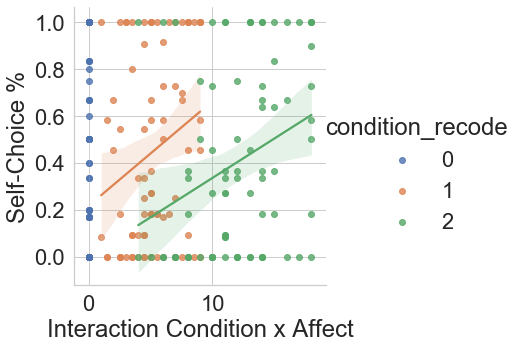

In [107]:
sns.set_style('whitegrid')
mlm2 =sns.lmplot(x ='conditionstress_intterm', y ='choice', data = updatedchoicedata, hue= 'condition_recode')
mlm2.set_axis_labels("Interaction Condition x Affect", "Self-Choice %")
plt.savefig('mlm_affectconditioninteraction.png', bbox_inches='tight')


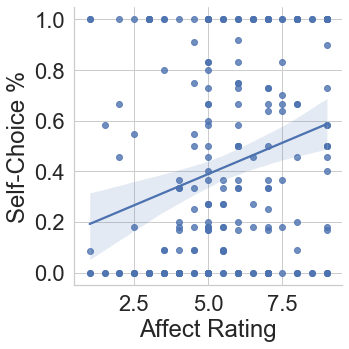

In [108]:
sns.set_style('whitegrid')
mlm= sns.lmplot(x ='recoded_stress', y ='choice', data = updatedchoicedata)
mlm.set_axis_labels("Affect Rating", "Self-Choice %")
plt.savefig('lm_affectandchoice.png', bbox_inches='tight')

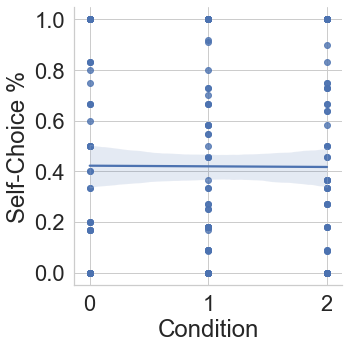

In [109]:
sns.set_style('whitegrid')
lmchoice =sns.lmplot(x ='condition_recode', y ='choice', data = updatedchoicedata)
lmchoice.set_axis_labels("Condition", "Self-Choice %")
plt.savefig('lm_choice.png', bbox_inches='tight')

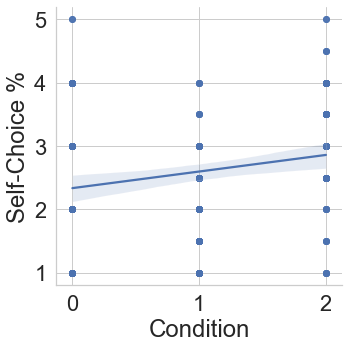

In [112]:
sns.set_style('whitegrid')
lmchoice =sns.lmplot(x ='condition_recode', y ='salience_mean', data = updatedchoicedata)
lmchoice.set_axis_labels("Condition", "Self-Choice %")
plt.savefig('lm_choice.png', bbox_inches='tight')

                  PROLIFIC_ID  condition_recode  afterstresschange  \
0    568d286ab5a2c2000cb6a91c                 0                1.0   
1    568d286ab5a2c2000cb6a91c                 1                1.0   
2    568d286ab5a2c2000cb6a91c                 2                1.0   
3    595727bd7c76640001aa8f6e                 0                1.0   
4    595727bd7c76640001aa8f6e                 1                1.0   
..                        ...               ...                ...   
244  641361334c91a0c6ff4c5b79                 1                1.0   
245  641361334c91a0c6ff4c5b79                 2                1.0   
246  641a3df3c874807a1a8734bc                 0                1.0   
247  641a3df3c874807a1a8734bc                 1                1.0   
248  641a3df3c874807a1a8734bc                 2                1.0   

     salience_mean  stress_mean  recoded_stress    choice  rej-acc  \
0              4.0          5.0             5.0  0.833333     -0.5   
1              1.5 

In [132]:
dast_choicescatter = pd.DataFrame()
dast_choicescatter['DAST_'] = dast['DAST_score']
dast_choicescatter['rejchoice_'] = rejchoice
print(dast_choicescatter)

    DAST_  rejchoice_
0       4    1.000000
1       6    0.250000
2       4    0.090909
3       6    0.500000
4       6    1.000000
..    ...         ...
78      4    0.000000
79      4    0.545455
80      4    0.666667
81      5    1.000000
82      5    0.166667

[83 rows x 2 columns]


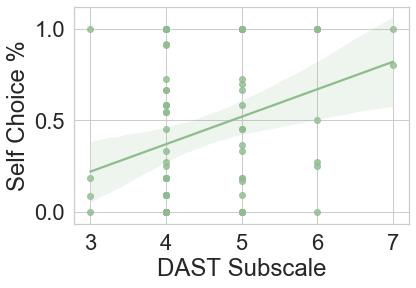

In [136]:
r = scipy.stats.spearmanr(a=dast_choicescatter.DAST_, b=dast_choicescatter.rejchoice_)[0]
dast_rejchoice_scatter = sns.regplot(x= "DAST_", y= "rejchoice_", data= dast_choicescatter, scatter_kws={"color": "darkseagreen"}, line_kws={"color": "darkseagreen"})
dast_rejchoice_scatter.set_ylabel('Self Choice %')
dast_rejchoice_scatter.set_xlabel('DAST Subscale')
#scatter_srqadmiration_choice= plt.text(2, .82, 'r = ' + str(round(r, 2)))
plt.savefig('dast_rejchoice_scatter.png', bbox_inches='tight')

In [ ]:
rsq_affectscatter = pd.DataFrame()
rsq_affectscatter['DAST_'] = dast['DAST_score']
rsq_affectscatter['rejchoice_'] = rejchoice
print(dast_choicescatter)
r = scipy.stats.spearmanr(a=dast_choicescatter.DAST_, b=dast_choicescatter.rejchoice_)[0]
dast_rejchoice_scatter = sns.regplot(x= "DAST_", y= "rejchoice_", data= dast_choicescatter, scatter_kws={"color": "darkseagreen"}, line_kws={"color": "darkseagreen"})
dast_rejchoice_scatter.set_ylabel('Self Choice %')
dast_rejchoice_scatter.set_xlabel('DAST Subscale')
#scatter_srqadmiration_choice= plt.text(2, .82, 'r = ' + str(round(r, 2)))
plt.savefig('dast_rejchoice_scatter.png', bbox_inches='tight')